<a href="https://colab.research.google.com/github/CarlosOX/SemanaTec/blob/main/09_2_actividad_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre:** Carlos Eduardo Ortega Clement 
* **Matrícula:** A01707480

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [3]:
# Carga las librerías necesarias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from google.colab import files

In [4]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.


uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [9]:
# Vemos los tipos de datos de cada columna (característica)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [10]:
# Resumen estadísticos de las variables númericas
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Basado en mi análisis estadístico, en cuestión de los resultados de la desviación estándar, podemos decir las reviews de cada libro varían mucho entre si y el rating que todos tienen entre sí es muy cercano ya que existe un std de 0.22, el cuál es muy pequeño, casi 0. En promedio todos tienen un rating de 4.6 y un precio de 13. 

¿Cuáles son las variables relevantes e irrelevantes para el análisis?

En este caso serían las variables numéricas ya que se puede hacer un análisis completo de todas estas : User Rating Reviews Price Year

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? 

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué? Quitaría Nombre del libro y el Autor ya que solo describen los libros de forma individual y sirven para identificarlos, son variables que no sirven para analizar en conjunto con todos los libros.

* ¿Existen variables que tengan datos extraños? 

NO


* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte? 

No todas están en rangos iguales, como el año, es un número más descriptivo. ESto si puede afectar en el análisis ya que los rangos son muy distintos, al igual que el rating. 


* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

El género y el Año son parecidos porque los representan una descripción y no tienen un peso numérico a comparación de las otras variables.


Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

In [11]:
# Quitaremos la columna Name y Author ya que no aporta información valiosa.
df = df.drop('Name', axis=1)
df = df.drop('Author', axis=1)
df.head(6)

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction
5,4.4,12643,11,2011,Fiction


Text(0.5, 1.05, 'Distribución de las variables numéricas por género')

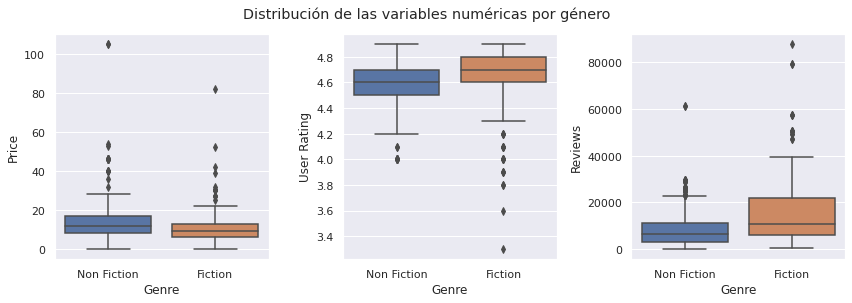

In [12]:
# Graficaremos las variables numéricas, incluimos el género

# Con subplot podemos incluir más de una gráfica por imagen.
# Vamos a graficar una cuadrícula de 1x3 imágenes
# También puedes graficar cada variable por separado.
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficamos los tres boxplot en una sola imagen.
sns.boxplot(data=df, y = 'Price', x='Genre', ax=axs[0])
sns.boxplot(data=df, y = 'User Rating', ax=axs[1], x='Genre')
sns.boxplot(data=df, y = 'Reviews', ax=axs[2], x='Genre')

# Esta opción es para que se ajusten las imágenes a la cuadrícula
plt.tight_layout()

# Esta opción es para poner un título general para las tres gráficas
plt.suptitle('Distribución de las variables numéricas por género', y=1.05)

<Axes: >

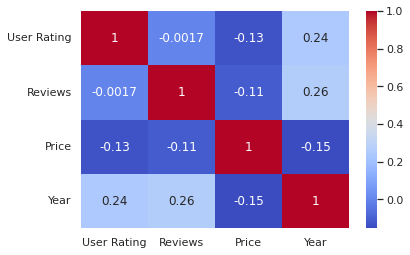

In [15]:

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='User Rating', ylabel='Price'>

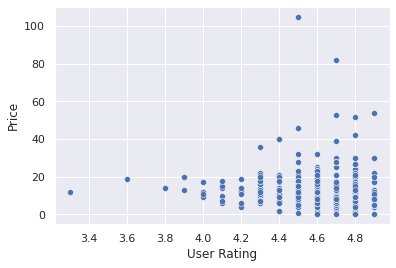

In [22]:

sns.scatterplot(data=df, x="User Rating", y="Price")





<Axes: xlabel='User Rating', ylabel='Reviews'>

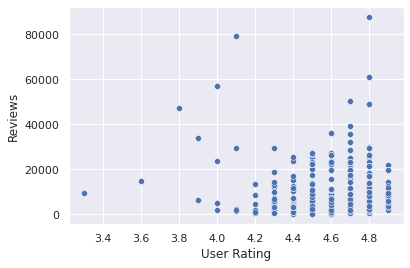

In [23]:
sns.scatterplot(data=df, x="User Rating", y="Reviews")

Dado los resultados de las gráficas podemos concluir que:

Gráficas de caja y bigote:

Para el análisis de precio y Gnénero podemos decir que para los libros de ficción existe  una distribución simétrica de los datos. En cambio, para los de no ficción hay una distribución un poco sesgada pero no mucho. Donde hay mucha diferencia entre la distribución de los datos es cuando analizamos las reviews por géneros y su Rating, tienen una distribución asimétrica.

Gráficas de calor:

Aquí podemos analizar que no existe una relación fuerte entre los datos, es muy variable

Gráficas de dispersión:

en la gráfica de dispersión podemos observar que en general no difieren mucho los datos entre sí, existen muchas reviews en un rango determinado y son pocos los libros que tienen muchas reviews o muy pocas.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

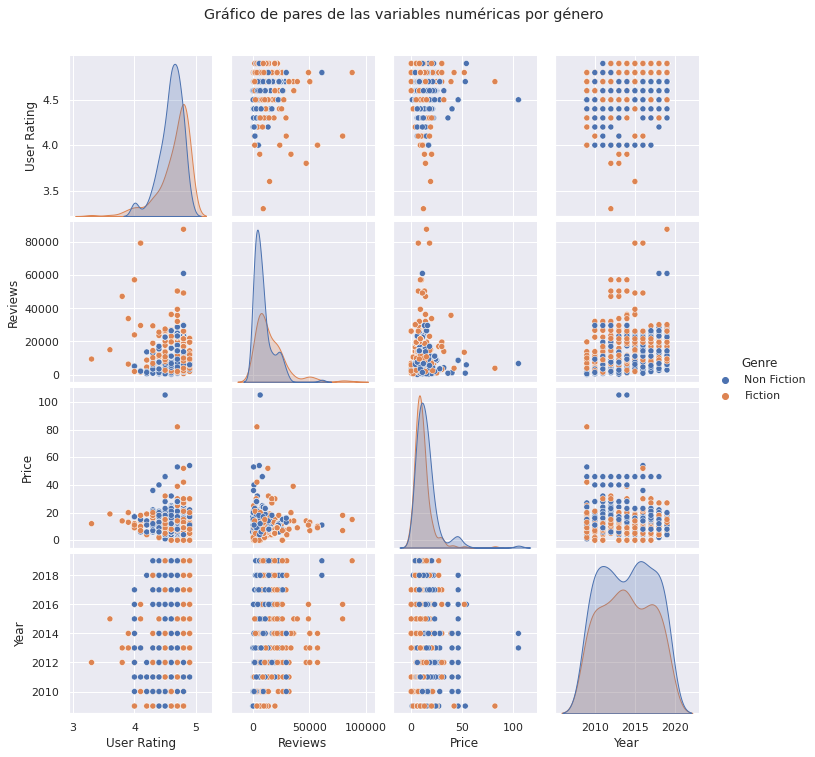

In [24]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

sns.pairplot(data=df, hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

ANALIZANDO LOS DATOS, TIENE VALORES MUY DISTINTOS, POR LO QUE LO MEJOR ES NORMALIZAR LAS VARIABLES PARA DISMINUIR ESA DIFERENCIA

In [27]:
from sklearn.preprocessing import StandardScaler


# Vamos a escalar las tres variables con StandardScaler, el cual se encuentra 
# en SciKitLearn

# Seleccionamos las variables a normalizar
numeric_cols = ['User Rating', 'Reviews',	'Price','Year']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price,Year
0,0.359990,0.460453,-0.470810,0.632456
1,-0.080978,-0.844786,0.821609,-0.948683
2,0.359990,0.599440,0.175400,1.264911
3,0.359990,0.808050,-0.655441,0.948683
4,0.800958,-0.365880,-0.101547,1.581139


PARA DETERMINAR EL NÚMERO DE CLUSTERS, BUSCAMOS UN VALOR ÓPTIMO EN K UTILLIZANDO EL MÉTODO DEL CODO

In [36]:
# # Importamos librerias en caso de no haberlo hecho antes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Declaramos algunos arreglos. Los usuaremos para guardar los valores de la WCSS
 # y la silhouette score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

    

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

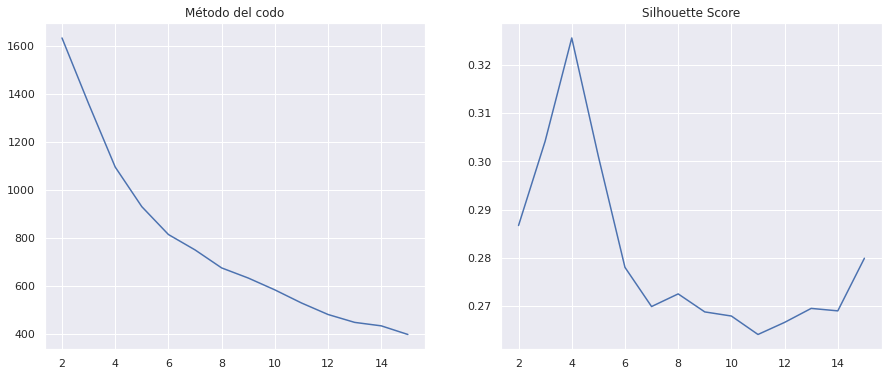

In [37]:
# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

DADO A LOS RESULTADOS, PODEMOS DECIR QUE UN VALOR DE GRUPOS DE 4 ES BUENO

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

In [40]:
# Generamos los 4 grupos
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Year,Genre,Grupo
0,4.7,17350,8,2016,Non Fiction,3
1,4.6,2052,22,2011,Fiction,1
2,4.7,18979,15,2018,Non Fiction,3
3,4.7,21424,6,2017,Fiction,3
4,4.8,7665,12,2019,Non Fiction,3


A cada grupo le pondría de nombre:

Grupo 0: Libros baratos con muchas reviews

Grupo 1: Libros con pocas reviews, más variado de precio y con más rating

Grupo 2: Libros más costosos

Grupo 3: Libros no tan costosos con variedad de rating y reviews

Text(0.5, 1.05, '4 grupos de libros')

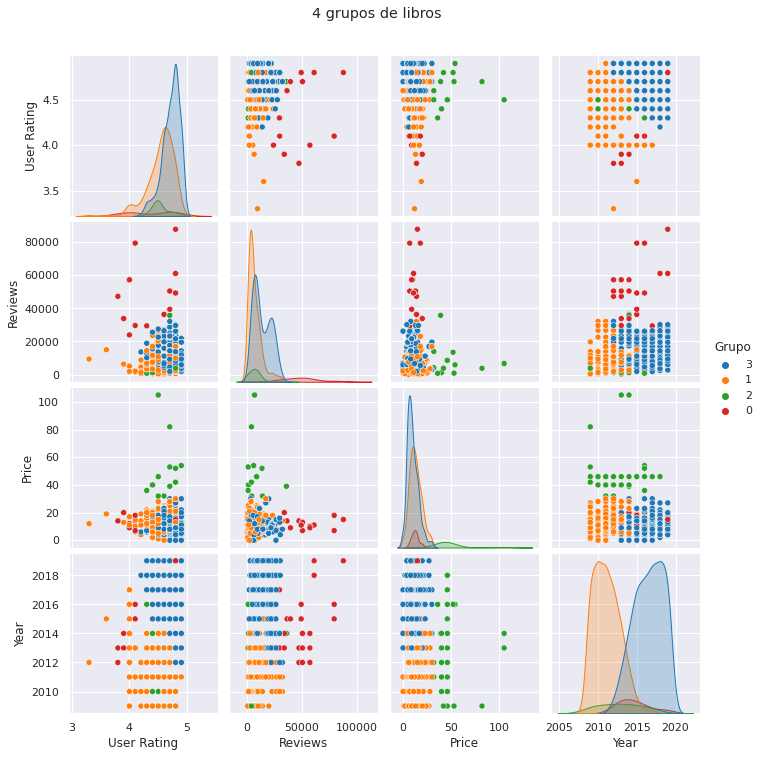

In [42]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.


sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de libros', y=1.05)

In [43]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

import plotly.express as px

# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de libros',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()